# ワンホットエンコーディング

In [3]:
import pandas as pd
import os
import mglearn

adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path,
    header=None,
    index_col=False,
    names=[
        "age",
        "workclass",
        "fnlwgt",
        "education",
        "education-num",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "gender",
        "capital-gain",
        "capital-loss",
        "hours-per-week",
        "native-country",
        "income",
    ],
)
data = data[
    [
        "age",
        "workclass",
        "education",
        "gender",
        "hours-per-week",
        "occupation",
        "income",
    ]
]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### OneHotEncoderのデモ

In [4]:
import pandas as pd

demo_df = pd.DataFrame({'Integer Features': [0, 1, 2, 1], 'Categorical Features': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Features,Categorical Features
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [5]:
pd.get_dummies(demo_df)

,Integer Features,Categorical Features_box,Categorical Features_fox,Categorical Features_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


連続特徴量でもcolumnsパラメータで明示的に指定するとカテゴリ特徴量として扱うことができる

In [6]:
demo_df['Integer Features'] = demo_df['Integer Features'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Features', 'Categorical Features'])

,Integer Features_0,Integer Features_1,Integer Features_2,Categorical Features_box,Categorical Features_fox,Categorical Features_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


### wave回帰データセットの線形回帰モデルと、決定木回帰の比較

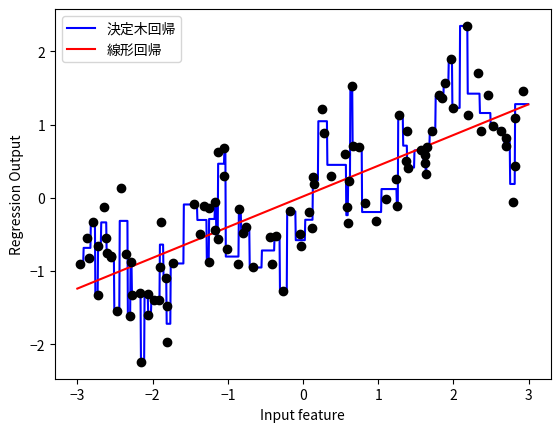

In [14]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Noto Sans CJK JP'

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="決定木回帰", color="b")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="線形回帰", color="r")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()


### 特徴量の入力レンジを固定数のbinに詰める

In [15]:
bins = np.linspace(-3, 3, 11)
print("ビンのエッジ:\n", bins)

ビンのエッジ:
 [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [16]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [17]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoderで変換する
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


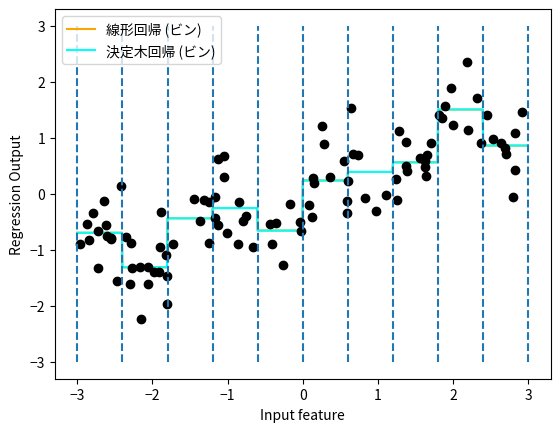

In [19]:

line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="線形回帰 (ビン)", color="orange")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="決定木回帰 (ビン)", color="cyan")

plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(bins, ymin=-3, ymax=3, linestyle='--')
plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input feature")
plt.show()

### 交互作用と多項式

In [27]:
x_combined = np.hstack([X, X_binned])
print(x_combined.shape)

(100, 11)


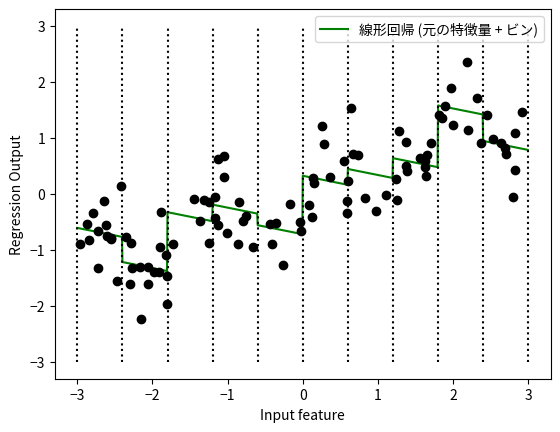

In [30]:

reg = LinearRegression().fit(x_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="線形回帰 (元の特徴量 + ビン)", color="green")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()